In [1]:
import subprocess;
import platform;
import pandas as pd;
import numpy as np;
from shapely.geometry import Point
import geopandas
import matplotlib.pyplot as plt
import os
import math

In [2]:
# this just selects the correct depthmapXcli from the lib folder, depending on the
# depending on the operating system jupyter python is running on (darwin is macOS)

if platform.system() == "Windows":
    depthmapXcli = "./lib/depthmapXcli.exe"
elif platform.system() == "Darwin":
    depthmapXcli = "./lib/depthmapXcli.darwin"
elif platform.system() == "Linux":
    depthmapXcli = "./lib/depthmapXcli.linux"
    # in linux it's necessary to make the cli executable
    new_mode = os.stat(depthmapXcli).st_mode | 0o100
    os.chmod(depthmapXcli,new_mode)
else:
    raise ValueError('Unknown platform: ' + platform.system())

In [3]:
# Uncomment the next lines and run them to generate a text file with the cli options
# with open("depthmapXcli_commands.txt", "w") as text_file:
#     text_file.write(subprocess.check_output([depthmapXcli, "-h"]).decode("utf-8"))

In [4]:
# Import the extended barnsbury map .dxf into a .graph file
subprocess.check_output([depthmapXcli,
                         "-f",  "data/barnsbury_extended1.dxf",
                         "-o",  "tmp/barnsbury_extended1_segment.graph",
                         "-m",  "IMPORT",
                         "-it", "drawing"])

b''

In [5]:
# Convert the map to an axial map
subprocess.check_output([depthmapXcli,
                         "-f",   "tmp/barnsbury_extended1_segment.graph",
                         "-o",   "tmp/barnsbury_extended1_segment.graph",
                         "-m",   "MAPCONVERT",
                         "-co",  "axial",
                         "-con", "Axial Map"]);
# Convert the axial map to a segment map removing stubs over 40%
subprocess.check_output([depthmapXcli,
                         "-f",   "tmp/barnsbury_extended1_segment.graph",
                         "-o",   "tmp/barnsbury_extended1_segment.graph",
                         "-m",   "MAPCONVERT",
                         "-co",  "segment",
                         "-con", "Segment Map",
                         "-cir",
                         "-crsl", "40"]);

In [6]:
# Export the segment map from the .graph file into a mif/mid pair called 'out.mif'
# and 'out.mid' and erase the former .graph file
subprocess.check_output([depthmapXcli,
                         "-f",  "tmp/barnsbury_extended1_segment.graph",
                         "-o",  "tmp/out.mif",
                         "-m",  "EXPORT",
                         "-em", "shapegraph-map-mif"]);

# read the mif file into a variable
segmentMap = geopandas.read_file("tmp/out.mif")
# set the CRS to avoid having geopandas complain
segmentMap.crs = ''
# delete the mif/mid files
os.remove("tmp/out.mif")
os.remove("tmp/out.mid")

<AxesSubplot:>

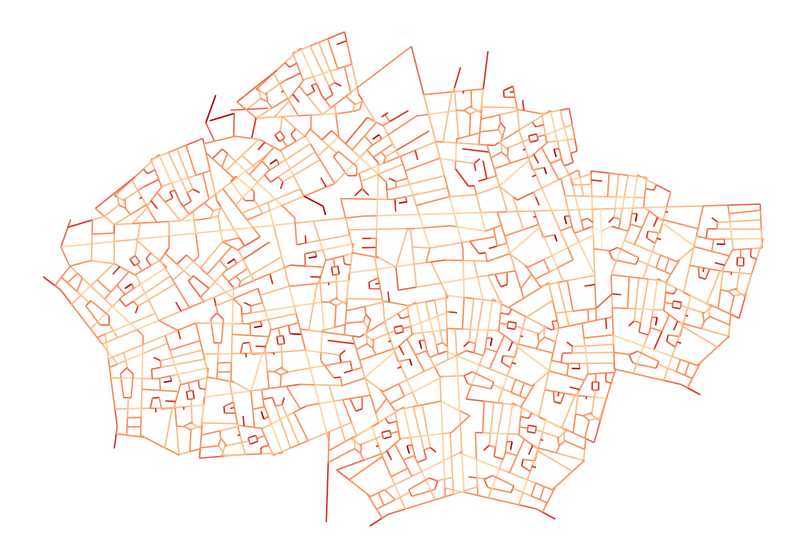

In [7]:
# quick plot to see the outcome of the above (should be
# the segment map coloured based on connectivity)
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
ax.set_aspect('equal')
segmentMap.plot(ax=ax, column='Connectivity', cmap='OrRd_r')

In [8]:
# perform segment angular (tulip) analysis with radius 800 metric,
# weighted by Segment Length and include choice
subprocess.check_output([depthmapXcli,
                         "-f",  "tmp/barnsbury_extended1_segment.graph",
                         "-o",  "tmp/barnsbury_extended1_segment.graph",
                         "-m",  "SEGMENT",
                         "-st", "tulip",           # analysis type
                         "-sr", "800",             # radius
                         "-srt", "metric",         # radius type
                         "-sic",                   # include choice
                         "-stb", "1024",           # tulip bins (default = 1024)
                         "-swa", "Segment Length"  # weight by
                        ]);

In [9]:
# Export the segment map from the .graph file into a mif/mid pair called 'out.mif'
# and 'out.mid' and erase the former .graph file
subprocess.check_output([depthmapXcli,
                         "-f",  "tmp/barnsbury_extended1_segment.graph",
                         "-o",  "tmp/out.mif",
                         "-m",  "EXPORT",
                         "-em", "shapegraph-map-mif"]);

# read the mif file into a variable
segmentMap = geopandas.read_file("tmp/out.mif")
# set the CRS to avoid having geopandas complain
segmentMap.crs = ''
# delete the mif/mid files
os.remove("tmp/out.mif")
os.remove("tmp/out.mid")

<AxesSubplot:>

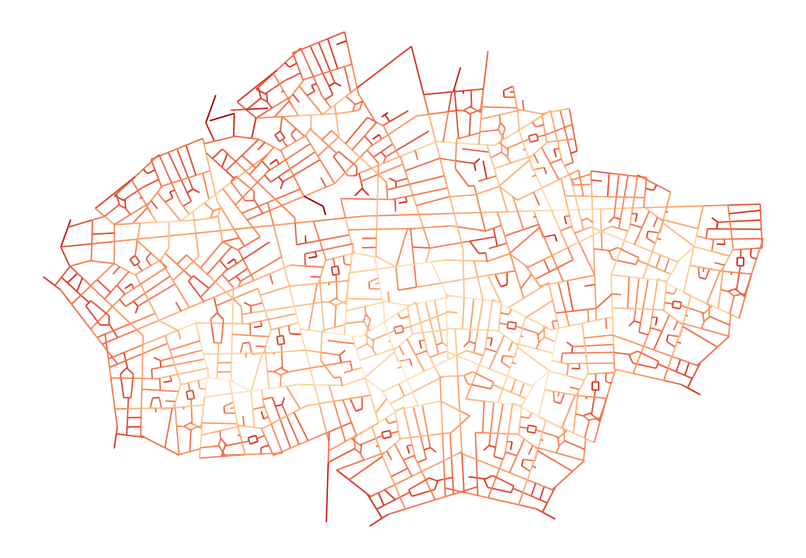

In [10]:
# Plot integration R800
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
ax.set_aspect('equal')
segmentMap.plot(ax=ax, column='T1024_Integration_R800_metric', cmap='OrRd_r')

<AxesSubplot:>

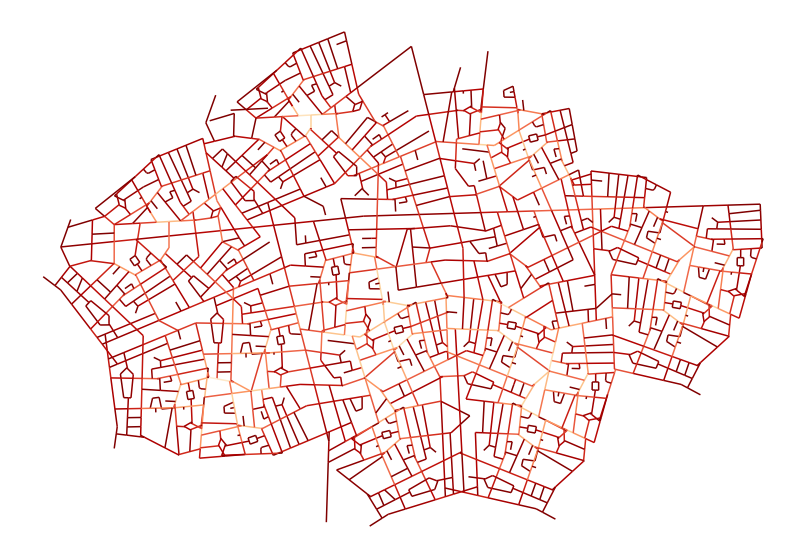

In [11]:
# Plot choice R800
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
ax.set_aspect('equal')
segmentMap.plot(ax=ax, column='T1024_Choice_R800_metric', cmap='OrRd_r')

In [12]:
# perform angular (tulip) segment step depth from 530636.412,184463.222
subprocess.check_output([depthmapXcli,
                         "-f",  "tmp/barnsbury_extended1_segment.graph",
                         "-o",  "tmp/barnsbury_extended1_segment.graph",
                         "-m",  "STEPDEPTH",
                         "-sdp", "530636.412,184463.222", # step depth point
                         "-sdt", "visual"                 # step depth type (visual = angular)
                        ]);

In [13]:
# Export the segment map from the .graph file into a mif/mid pair called 'out.mif'
# and 'out.mid' and erase the former .graph file
subprocess.check_output([depthmapXcli,
                         "-f",  "tmp/barnsbury_extended1_segment.graph",
                         "-o",  "tmp/out.mif",
                         "-m",  "EXPORT",
                         "-em", "shapegraph-map-mif"]);

# read the mif file into a variable
segmentMap = geopandas.read_file("tmp/out.mif")
# set the CRS to avoid having geopandas complain
segmentMap.crs = ''
# delete the mif/mid files
os.remove("tmp/out.mif")
os.remove("tmp/out.mid")

<AxesSubplot:>

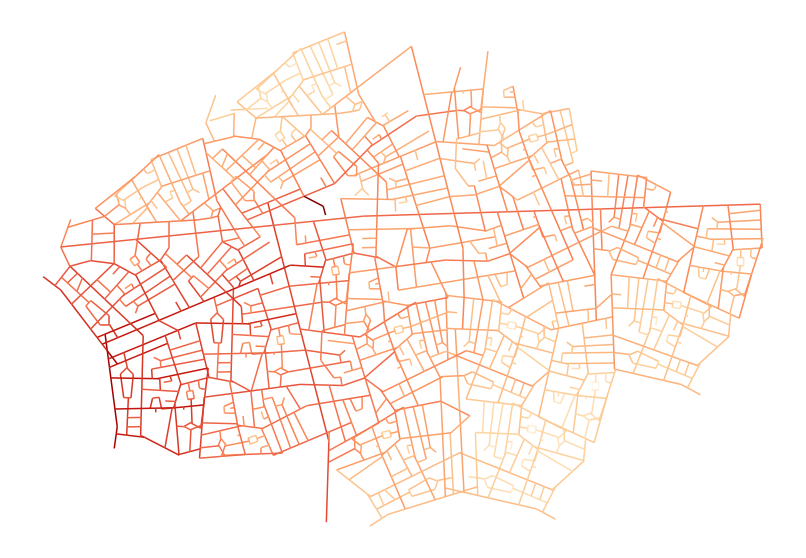

In [14]:
# Plot choice R800
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
ax.set_aspect('equal')
segmentMap.plot(ax=ax, column='Angular_Step_Depth', cmap='OrRd_r')